# Predictive Analytics Models for Mature Students at Anglia Ruskin University
By Mervin Ogawa

Importing the libraries

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Importing the dataset

In [21]:
pip install xlrd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [22]:
df_2018 = pd.read_excel ('PERS 2018.xlsx')
df_2019 = pd.read_excel ('PERS 2019.xlsx')
df_2020 = pd.read_excel ('PERS 2020.xlsx')
df_2021 = pd.read_excel ('PERS 2021.xlsx')

Checking the first 5 records of column "Parliamentary constituency" in 2021

In [23]:
df_2021["Parliamentary constituency"].head()

0                 Dagenham and Rainham
1                           Colchester
2                            Stevenage
3                   Rutland and Melton
4    Central Suffolk and North Ipswich
Name: Parliamentary constituency, dtype: object

Checking the first 5 records of column "Parliamentary constituency 2010" in 2018

In [25]:
df_2018["Parliamentary constituency 2010"].head()

0                        Bedford
1    Harrogate and Knaresborough
2    Harrogate and Knaresborough
3                        Romford
4                         Ogmore
Name: Parliamentary constituency 2010, dtype: object

Renaming the column name for 2018-2020 to make it the same as 2021

In [26]:
df_2018 = df_2018.rename(columns={"Parliamentary constituency 2010": "Parliamentary constituency"})
df_2019 = df_2019.rename(columns={"Parliamentary constituency 2010": "Parliamentary constituency"})
df_2020 = df_2020.rename(columns={"Parliamentary constituency 2010": "Parliamentary constituency"})

In [27]:
df_2021.tail()

,Applicant domicile (low level – overseas country focus),Applicant domicile (high level - 3 levels),Applicant domicile (high level - 6 levels),Applicant domicile (medium level - UK and global regions),Applicant domicile (low level - domestic focus),Age band (6 levels),Age band (7 levels),Age band (5 levels),Age band (detailed),Age (not banded),...,Offer as-at 30 June,Unconditional Offer as-at 30 June,Conditional Offer as-at 30 June,Firm Reply as-at 30 June,Insurance Reply as-at 30 June,Reject as-at 30 June,Decline as-at 30 June,Declines by Default (DBD) as-at 30 June,Acceptance (Main scheme),Withdrawals
19768,United Kingdom,UK,England,East of England,Hertfordshire,19,19,19,19,19,...,0,0,0,0,0,0,0,0,0,0
19769,United Kingdom,UK,England,North West,Rochdale,18,18,18,18,18,...,0,0,0,0,0,0,0,0,0,0
19770,United Kingdom,UK,England,London,Waltham Forest,20 to 24,20 to 24,20,20,20,...,0,0,0,0,0,0,0,0,0,0
19771,United Kingdom,UK,England,East of England,Essex,20 to 24,20 to 24,21 and over,21,21,...,0,0,0,0,0,0,0,0,0,0
19772,United Kingdom,UK,England,East of England,Cambridgeshire,18,18,18,18,18,...,0,0,0,0,0,0,0,0,0,0


Merging into one DataFrame

In [28]:
merged_df = pd.DataFrame()
merged_df = merged_df.append(df_2018)
merged_df = merged_df.append(df_2019)
merged_df = merged_df.append(df_2020)
merged_df = merged_df.append(df_2021)


In [29]:
merged_df.tail()

,Applicant domicile (low level – overseas country focus),Applicant domicile (high level - 3 levels),Applicant domicile (high level - 6 levels),Applicant domicile (medium level - UK and global regions),Applicant domicile (low level - domestic focus),Age band (6 levels),Age band (7 levels),Age band (5 levels),Age band (detailed),Age (not banded),...,Unconditional Offer as-at 30 June,Conditional Offer as-at 30 June,Firm Reply as-at 30 June,Insurance Reply as-at 30 June,Reject as-at 30 June,Decline as-at 30 June,Declines by Default (DBD) as-at 30 June,Acceptance (Main scheme),Withdrawals,Age band (8 levels)
19768,United Kingdom,UK,England,East of England,Hertfordshire,19,19,19,19,19,...,0,0,0,0,0,0,0,0,0,19
19769,United Kingdom,UK,England,North West,Rochdale,18,18,18,18,18,...,0,0,0,0,0,0,0,0,0,18
19770,United Kingdom,UK,England,London,Waltham Forest,20 to 24,20 to 24,20,20,20,...,0,0,0,0,0,0,0,0,0,20
19771,United Kingdom,UK,England,East of England,Essex,20 to 24,20 to 24,21 and over,21,21,...,0,0,0,0,0,0,0,0,0,21 to 24
19772,United Kingdom,UK,England,East of England,Cambridgeshire,18,18,18,18,18,...,0,0,0,0,0,0,0,0,0,18


Move "Acceptance (Main scheme)" to the last column

In [30]:
df_temp = merged_df.pop("Acceptance (Main scheme)")
merged_df["Acceptance (Main scheme)"] = df_temp


In [31]:
merged_df.head()

,Applicant domicile (low level – overseas country focus),Applicant domicile (high level - 3 levels),Applicant domicile (high level - 6 levels),Applicant domicile (medium level - UK and global regions),Applicant domicile (low level - domestic focus),Age band (6 levels),Age band (7 levels),Age band (5 levels),Age band (detailed),Age (not banded),...,Unconditional Offer as-at 30 June,Conditional Offer as-at 30 June,Firm Reply as-at 30 June,Insurance Reply as-at 30 June,Reject as-at 30 June,Decline as-at 30 June,Declines by Default (DBD) as-at 30 June,Withdrawals,Age band (8 levels),Acceptance (Main scheme)
0,United Kingdom,UK,England,East of England,Bedfordshire,40 and over,35 and over,21 and over,35 to 44,42,...,0,0,0,0,0,0,0,1,NaN,0
1,United Kingdom,UK,England,Yorkshire and The Humber,North Yorkshire,25 to 39,30 to 34,21 and over,32,32,...,1,0,0,0,0,1,0,0,NaN,0
2,United Kingdom,UK,England,Yorkshire and The Humber,North Yorkshire,25 to 39,30 to 34,21 and over,32,32,...,0,1,0,0,0,1,0,0,NaN,0
3,United Kingdom,UK,England,London,Havering,25 to 39,30 to 34,21 and over,30,30,...,0,0,0,0,0,0,0,0,NaN,1
4,United Kingdom,UK,Wales,Wales,Bridgend,25 to 39,30 to 34,21 and over,34,34,...,0,0,0,0,0,0,0,1,NaN,0


In [34]:
final_df = merged_df.dropna(axis=1)

In [35]:
final_df.head()

,Applicant domicile (low level – overseas country focus),Applicant domicile (high level - 3 levels),Applicant domicile (high level - 6 levels),Applicant domicile (medium level - UK and global regions),Applicant domicile (low level - domestic focus),Age band (6 levels),Age band (7 levels),Age band (5 levels),Age band (detailed),Age (not banded),...,Offer as-at 30 June,Unconditional Offer as-at 30 June,Conditional Offer as-at 30 June,Firm Reply as-at 30 June,Insurance Reply as-at 30 June,Reject as-at 30 June,Decline as-at 30 June,Declines by Default (DBD) as-at 30 June,Withdrawals,Acceptance (Main scheme)
0,United Kingdom,UK,England,East of England,Bedfordshire,40 and over,35 and over,21 and over,35 to 44,42,...,0,0,0,0,0,0,0,0,1,0
1,United Kingdom,UK,England,Yorkshire and The Humber,North Yorkshire,25 to 39,30 to 34,21 and over,32,32,...,1,1,0,0,0,0,1,0,0,0
2,United Kingdom,UK,England,Yorkshire and The Humber,North Yorkshire,25 to 39,30 to 34,21 and over,32,32,...,1,0,1,0,0,0,1,0,0,0
3,United Kingdom,UK,England,London,Havering,25 to 39,30 to 34,21 and over,30,30,...,0,0,0,0,0,0,0,0,0,1
4,United Kingdom,UK,Wales,Wales,Bridgend,25 to 39,30 to 34,21 and over,34,34,...,0,0,0,0,0,0,0,0,1,0


In [36]:
mature_df = final_df.loc[final_df["Age band (5 levels)"] == "21 and over"]
mature_df

,Applicant domicile (low level – overseas country focus),Applicant domicile (high level - 3 levels),Applicant domicile (high level - 6 levels),Applicant domicile (medium level - UK and global regions),Applicant domicile (low level - domestic focus),Age band (6 levels),Age band (7 levels),Age band (5 levels),Age band (detailed),Age (not banded),...,Offer as-at 30 June,Unconditional Offer as-at 30 June,Conditional Offer as-at 30 June,Firm Reply as-at 30 June,Insurance Reply as-at 30 June,Reject as-at 30 June,Decline as-at 30 June,Declines by Default (DBD) as-at 30 June,Withdrawals,Acceptance (Main scheme)
0,United Kingdom,UK,England,East of England,Bedfordshire,40 and over,35 and over,21 and over,35 to 44,42,...,0,0,0,0,0,0,0,0,1,0
1,United Kingdom,UK,England,Yorkshire and The Humber,North Yorkshire,25 to 39,30 to 34,21 and over,32,32,...,1,1,0,0,0,0,1,0,0,0
2,United Kingdom,UK,England,Yorkshire and The Humber,North Yorkshire,25 to 39,30 to 34,21 and over,32,32,...,1,0,1,0,0,0,1,0,0,0
3,United Kingdom,UK,England,London,Havering,25 to 39,30 to 34,21 and over,30,30,...,0,0,0,0,0,0,0,0,0,1
4,United Kingdom,UK,Wales,Wales,Bridgend,25 to 39,30 to 34,21 and over,34,34,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19757,United Kingdom,UK,England,London,Barking and Dagenham,25 to 39,30 to 34,21 and over,31,31,...,0,0,0,0,0,0,0,0,0,0
19759,United Kingdom,UK,England,East of England,Essex,25 to 39,30 to 34,21 and over,34,34,...,0,0,0,0,0,0,0,0,0,0
19761,United Kingdom,UK,England,East of England,Cambridgeshire,25 to 39,30 to 34,21 and over,31,31,...,0,0,0,0,0,0,0,0,0,0
19767,United Kingdom,UK,England,London,Lambeth,20 to 24,20 to 24,21 and over,22,22,...,0,0,0,0,0,0,0,0,0,0


Write DataFrame into Excel

In [37]:
mature_df.to_excel("mature_admission.xlsx")

Plot Gender Distribution

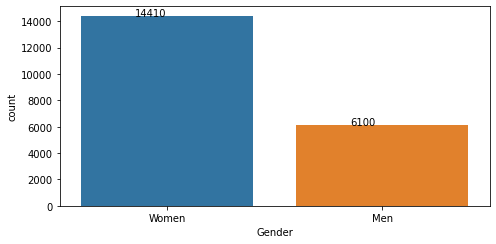

In [ ]:
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True

ax = sns.countplot(x="Gender", data=mature_df)

for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.show()

Select the most relevant attributes (column names) and save it onto a new DataFrame


In [111]:
selected_mature_df = mature_df[['Applicant domicile (high level - 3 levels)',
'Gender',
'Ethnic group (summary level)',
'Disability indicator',
'Deferred status',
'Live at home indicator',
'Cycle Year',
'Offer as-at 30 June',
'Unconditional Offer as-at 30 June',
'Conditional Offer as-at 30 June',
'Firm Reply as-at 30 June',
'Insurance Reply as-at 30 June',
'Reject as-at 30 June',
'Decline as-at 30 June',
'Declines by Default (DBD) as-at 30 June',
'Withdrawals ',
'Acceptance (Main scheme)']].copy()


Display the streamlined DataFrame

In [112]:
selected_mature_df

,Applicant domicile (high level - 3 levels),Gender,Ethnic group (summary level),Disability indicator,Deferred status,Live at home indicator,Cycle Year,Offer as-at 30 June,Unconditional Offer as-at 30 June,Conditional Offer as-at 30 June,Firm Reply as-at 30 June,Insurance Reply as-at 30 June,Reject as-at 30 June,Decline as-at 30 June,Declines by Default (DBD) as-at 30 June,Withdrawals,Acceptance (Main scheme)
0,UK,Women,Black,Disability declared,Not deferred,Applicant intending to live at home,2018,0,0,0,0,0,0,0,0,1,0
1,UK,Men,Black,No disability declared,Not deferred,Applicant not intending to live at home,2018,1,1,0,0,0,0,1,0,0,0
2,UK,Men,Black,No disability declared,Not deferred,Applicant not intending to live at home,2018,1,0,1,0,0,0,1,0,0,0
3,UK,Women,Black,No disability declared,Not deferred,Applicant intending to live at home,2018,0,0,0,0,0,0,0,0,0,1
4,UK,Women,White,No disability declared,Not deferred,Applicant not intending to live at home,2018,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19757,UK,Men,Other,No disability declared,Not deferred,Applicant intending to live at home,2021,0,0,0,0,0,0,0,0,0,0
19759,UK,Women,Unknown,No disability declared,Not deferred,Applicant not intending to live at home,2021,0,0,0,0,0,0,0,0,0,0
19761,UK,Women,White,Disability declared,Not deferred,Applicant intending to live at home,2021,0,0,0,0,0,0,0,0,0,0
19767,UK,Men,Other,No disability declared,Not deferred,Applicant intending to live at home,2021,0,0,0,0,0,0,0,0,0,0


Replace values 1: True   0: False

In [113]:
selected_mature_df["Gender"] = selected_mature_df["Gender"].replace(["Men"],1)
selected_mature_df["Gender"] = selected_mature_df["Gender"].replace(["Women"],0)

selected_mature_df["Disability indicator"] = selected_mature_df["Disability indicator"].replace(["Disability declared"],1)
selected_mature_df["Disability indicator"] = selected_mature_df["Disability indicator"].replace(["No disability declared"],0)

selected_mature_df["Deferred status"] = selected_mature_df["Deferred status"].replace(["Deferred"],1)
selected_mature_df["Deferred status"] = selected_mature_df["Deferred status"].replace(["Not deferred"],0)

selected_mature_df["Live at home indicator"] = selected_mature_df["Live at home indicator"].replace(["Applicant intending to live at home"],1)
selected_mature_df["Live at home indicator"] = selected_mature_df["Live at home indicator"].replace(["Applicant not intending to live at home"],0)

selected_mature_df

,Applicant domicile (high level - 3 levels),Gender,Ethnic group (summary level),Disability indicator,Deferred status,Live at home indicator,Cycle Year,Offer as-at 30 June,Unconditional Offer as-at 30 June,Conditional Offer as-at 30 June,Firm Reply as-at 30 June,Insurance Reply as-at 30 June,Reject as-at 30 June,Decline as-at 30 June,Declines by Default (DBD) as-at 30 June,Withdrawals,Acceptance (Main scheme)
0,UK,0,Black,1,0,1,2018,0,0,0,0,0,0,0,0,1,0
1,UK,1,Black,0,0,0,2018,1,1,0,0,0,0,1,0,0,0
2,UK,1,Black,0,0,0,2018,1,0,1,0,0,0,1,0,0,0
3,UK,0,Black,0,0,1,2018,0,0,0,0,0,0,0,0,0,1
4,UK,0,White,0,0,0,2018,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19757,UK,1,Other,0,0,1,2021,0,0,0,0,0,0,0,0,0,0
19759,UK,0,Unknown,0,0,0,2021,0,0,0,0,0,0,0,0,0,0
19761,UK,0,White,1,0,1,2021,0,0,0,0,0,0,0,0,0,0
19767,UK,1,Other,0,0,1,2021,0,0,0,0,0,0,0,0,0,0


Save the streamlined dataframe to an Excel file

In [114]:
selected_mature_df.to_excel("selected_mature.xlsx")

Display DataFrame info

In [115]:
selected_mature_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20510 entries, 0 to 19771
Data columns (total 17 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   Applicant domicile (high level - 3 levels)  20510 non-null  object
 1   Gender                                      20510 non-null  int64 
 2   Ethnic group (summary level)                20510 non-null  object
 3   Disability indicator                        20510 non-null  int64 
 4   Deferred status                             20510 non-null  int64 
 5   Live at home indicator                      20510 non-null  int64 
 6   Cycle Year                                  20510 non-null  int64 
 7   Offer as-at 30 June                         20510 non-null  int64 
 8   Unconditional Offer as-at 30 June           20510 non-null  int64 
 9   Conditional Offer as-at 30 June             20510 non-null  int64 
 10  Firm Reply as-at 30 Ju

Show distribution for all numerical features

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f01b1fe7a10>,
      dtype=object)

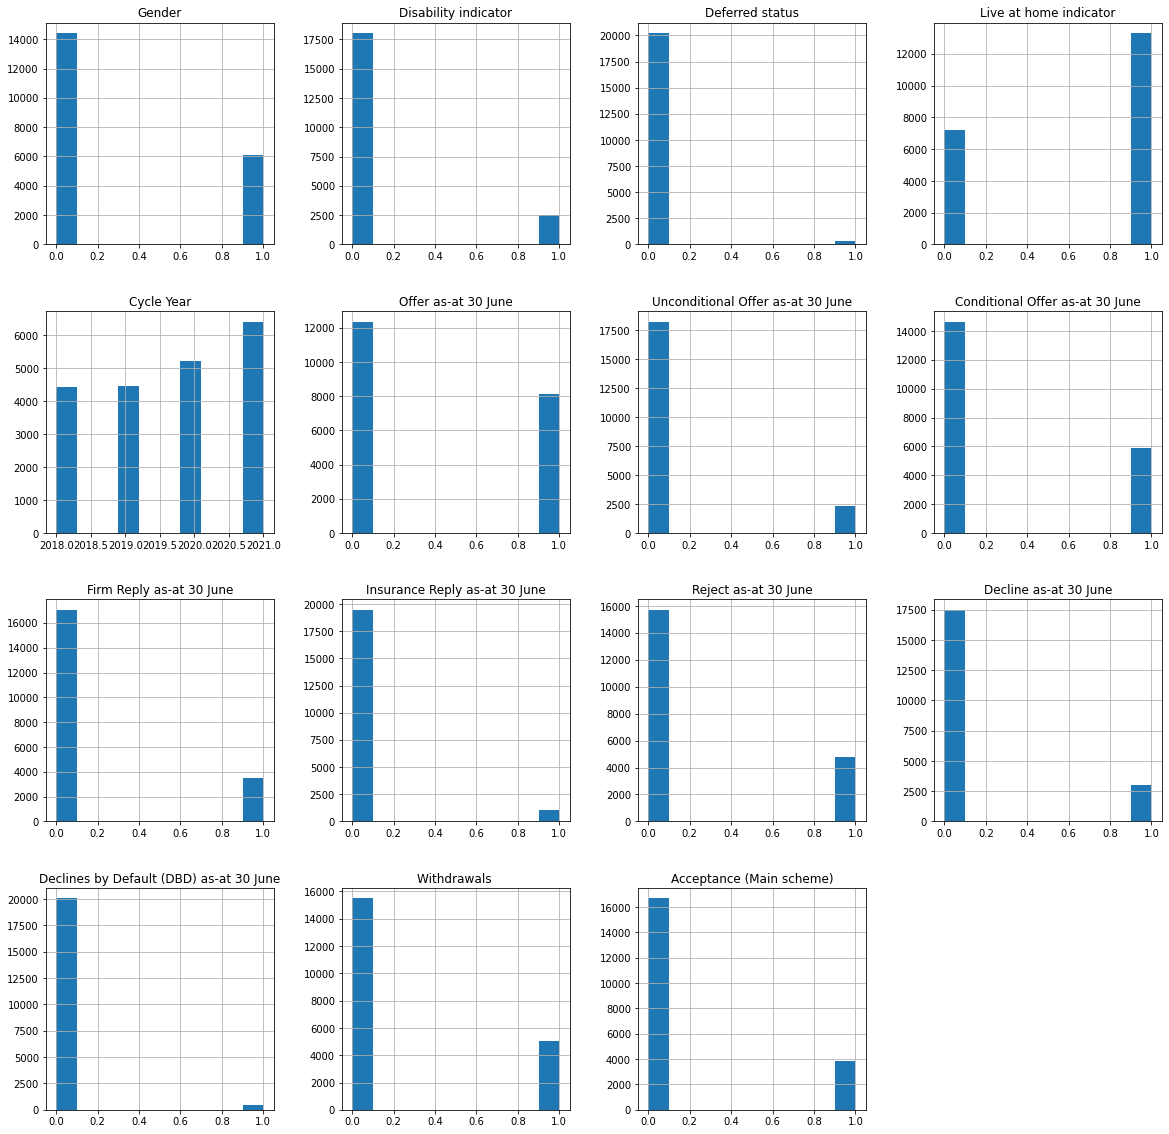

In [116]:
selected_mature_df.hist(figsize = (20,20))

Checking data for missing values (null)

In [117]:
selected_mature_df.isna().sum()

Applicant domicile (high level - 3 levels)    0
Gender                                        0
Ethnic group (summary level)                  0
Disability indicator                          0
Deferred status                               0
Live at home indicator                        0
Cycle Year                                    0
Offer as-at 30 June                           0
Unconditional Offer as-at 30 June             0
Conditional Offer as-at 30 June               0
Firm Reply as-at 30 June                      0
Insurance Reply as-at 30 June                 0
Reject as-at 30 June                          0
Decline as-at 30 June                         0
Declines by Default (DBD) as-at 30 June       0
Withdrawals                                   0
Acceptance (Main scheme)                      0
dtype: int64

Displaying descriptive statistics (count, mean, std, min, max, etc.)

In [118]:
selected_mature_df.describe()

,Gender,Disability indicator,Deferred status,Live at home indicator,Cycle Year,Offer as-at 30 June,Unconditional Offer as-at 30 June,Conditional Offer as-at 30 June,Firm Reply as-at 30 June,Insurance Reply as-at 30 June,Reject as-at 30 June,Decline as-at 30 June,Declines by Default (DBD) as-at 30 June,Withdrawals,Acceptance (Main scheme)
count,20510.000000,20510.000000,20510.000000,20510.000000,20510.000000,20510.000000,20510.000000,20510.000000,20510.00000,20510.000000,20510.000000,20510.000000,20510.000000,20510.000000,20510.000000
mean,0.297416,0.121063,0.014286,0.648659,2019.662652,0.397416,0.111799,0.285617,0.16943,0.051828,0.234812,0.147782,0.022331,0.245197,0.186543
std,0.457132,0.326208,0.118669,0.477401,1.131530,0.489375,0.315127,0.451719,0.37514,0.221686,0.423892,0.354892,0.147760,0.430215,0.389554
min,0.000000,0.000000,0.000000,0.000000,2018.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,2019.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,1.000000,2020.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000,1.000000,2021.000000,1.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,2021.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Correlation matrix and heatmap plot

                                           Gender  Disability indicator  \
Gender                                   1.000000             -0.004736   
Disability indicator                    -0.004736              1.000000   
Deferred status                         -0.008218              0.023338   
Live at home indicator                  -0.173337             -0.063753   
Cycle Year                              -0.016419              0.015935   
Offer as-at 30 June                      0.033296              0.052295   
Unconditional Offer as-at 30 June        0.032164              0.035765   
Conditional Offer as-at 30 June          0.013633              0.031704   
Firm Reply as-at 30 June                -0.025169              0.021240   
Insurance Reply as-at 30 June           -0.008253              0.017065   
Reject as-at 30 June                    -0.015439             -0.039860   
Decline as-at 30 June                    0.056964              0.038773   
Declines by Default (DBD)

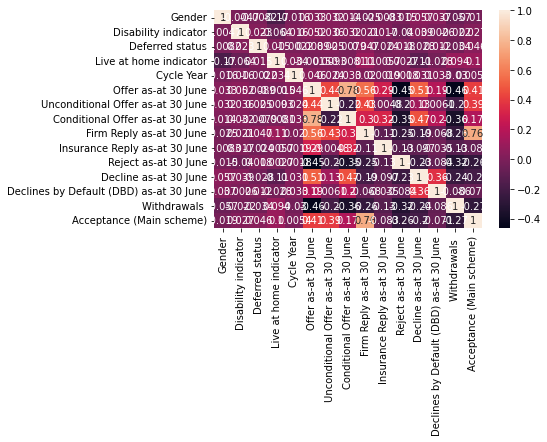

In [119]:
data = selected_mature_df.columns.values.tolist()
corr_matrix = selected_mature_df.loc[:,data].corr()
print(corr_matrix)
sns.heatmap(corr_matrix, annot=True)

Data Encoding

In [120]:
df = selected_mature_df

In [121]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in df:
  if df[col].dtype=='object':
    df[col]=le.fit_transform(df[col])

Data Preprocessing

In [122]:
df = selected_mature_df

X = df.iloc[:,:-1].values # getting all rows and columns except for final column
y = df.iloc[:,-1].values # the final column

Splitting the dataset into the Training set and Test set

In [123]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=0)

Feature Scaling

In [124]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Logistic Regression model on the Training set

In [125]:
#import the class
from sklearn.linear_model import LogisticRegression

#instantiate the model
logreg = LogisticRegression(random_state = 0)

#fit the model with data
logreg.fit(X_train, y_train)

LogisticRegression(random_state=0)

Checking accuracy, precision and recall of Logistic Regression model

In [126]:
#import the class
import sklearn.metrics as metrics

#predicting the test set
y_pred = logreg.predict(X_test)

#get accuracy
logreg_accuracy = metrics.accuracy_score(y_test, y_pred)

#get precision
logreg_precision = metrics.precision_score(y_test, y_pred)

#get recall
logreg_recall = metrics.recall_score(y_test, y_pred)

print("Accuracy: ", logreg_accuracy)
print("Precision: ", logreg_precision)
print("Recall: ", logreg_recall)

Accuracy:  0.9239469578783152
Precision:  0.8274725274725274
Recall:  0.7636916835699797


Confusion Matrix and Classification Report of the Logistic Regression model

In [127]:
from sklearn.metrics import confusion_matrix
print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix
[[3985  157]
 [ 233  753]]


In [128]:
from sklearn.metrics import classification_report
print("Classification Report")
print(classification_report(y_test, y_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      4142
           1       0.83      0.76      0.79       986

    accuracy                           0.92      5128
   macro avg       0.89      0.86      0.87      5128
weighted avg       0.92      0.92      0.92      5128



Random Forest model on the Training set

In [129]:
#import the class
from sklearn.ensemble import RandomForestClassifier

#instantiate the model
rndforest = RandomForestClassifier(n_estimators=200)

#fit the model with data
rndforest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

Checking accuracy, precision and recall of Random Forest model

In [130]:
#predicting the test set
y_pred = rndforest.predict(X_test)

#get accuracy
rndforest_accuracy = metrics.accuracy_score(y_test, y_pred)

#get precision
rndforest_precision = metrics.precision_score(y_test, y_pred)

#get recall
rndforest_recall = metrics.recall_score(y_test, y_pred)

print("Accuracy: ", rndforest_accuracy)
print("Precision: ", rndforest_precision)
print("Recall: ", rndforest_recall)

Accuracy:  0.9239469578783152
Precision:  0.8170212765957446
Recall:  0.7789046653144016


Confusion Matrix and Classification Report of the Random Forest model

In [131]:
from sklearn.metrics import confusion_matrix
print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix
[[3970  172]
 [ 218  768]]


In [132]:
from sklearn.metrics import classification_report
print("Classification Report")
print(classification_report(y_test, y_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.95      0.96      0.95      4142
           1       0.82      0.78      0.80       986

    accuracy                           0.92      5128
   macro avg       0.88      0.87      0.88      5128
weighted avg       0.92      0.92      0.92      5128



Decision Tree model on the Training set

In [133]:
#import the class
from sklearn.tree import DecisionTreeClassifier

#instantiate the model
decisiontree = DecisionTreeClassifier()

#fit the model with data
decisiontree.fit(X_train, y_train)

DecisionTreeClassifier()

Checking accuracy, precision and recall of Decision Tree model

In [134]:
#predicting the test set
y_pred = decisiontree.predict(X_test)

#get accuracy
decisiontree_accuracy = metrics.accuracy_score(y_test, y_pred)

#get precision
decisiontree_precision = metrics.precision_score(y_test, y_pred)

#get recall
decisiontree_recall = metrics.recall_score(y_test, y_pred)

print("Accuracy: ", decisiontree_accuracy)
print("Precision: ", decisiontree_precision)
print("Recall: ", decisiontree_recall)

Accuracy:  0.922191887675507
Precision:  0.8186753528773073
Recall:  0.7647058823529411


Confusion Matrix and Classification Report of the Decision Tree model

In [135]:
from sklearn.metrics import confusion_matrix
print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix
[[3975  167]
 [ 232  754]]


In [136]:
from sklearn.metrics import classification_report
print("Classification Report")
print(classification_report(y_test, y_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      4142
           1       0.82      0.76      0.79       986

    accuracy                           0.92      5128
   macro avg       0.88      0.86      0.87      5128
weighted avg       0.92      0.92      0.92      5128



Support Vector Machine (SVM) model on the Training set

In [137]:
#import the class
from sklearn.svm import SVC

#instantiate the model
svm = SVC()

#fit the model with data
svm.fit(X_train, y_train)

SVC()

Checking accuracy, precision and recall of Support Vector Machine (SVM) model

In [138]:
#predicting the test set
y_pred = svm.predict(X_test)

#get accuracy
svm_accuracy = metrics.accuracy_score(y_test, y_pred)

#get precision
svm_precision = metrics.precision_score(y_test, y_pred)

#get recall
svm_recall = metrics.recall_score(y_test, y_pred)

print("Accuracy: ", svm_accuracy)
print("Precision: ", svm_precision)
print("Recall: ", svm_recall)

Accuracy:  0.9255070202808112
Precision:  0.8355555555555556
Recall:  0.7626774847870182


Confusion Matrix and Classification Report of the SVM model

In [139]:
from sklearn.metrics import confusion_matrix
print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix
[[3994  148]
 [ 234  752]]


In [140]:
from sklearn.metrics import classification_report
print("Classification Report")
print(classification_report(y_test, y_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      4142
           1       0.84      0.76      0.80       986

    accuracy                           0.93      5128
   macro avg       0.89      0.86      0.88      5128
weighted avg       0.92      0.93      0.92      5128



Accuracy of Models

In [141]:
model_accuracy = {'Model': ['Logistic Regression','Random Forest','Decision Tree','Support Vector Machine'],
                  'Accuracy': [logreg_accuracy, rndforest_accuracy,decisiontree_accuracy,svm_accuracy],
                  'Precision': [logreg_precision, rndforest_precision,decisiontree_precision,svm_precision],
                  'Recall': [logreg_recall, rndforest_recall,decisiontree_recall,svm_recall]
                  }

df_model = pd.DataFrame(model_accuracy,columns=['Model','Accuracy',"Precision","Recall"])
df_model

,Model,Accuracy,Precision,Recall
0,Logistic Regression,0.923947,0.827473,0.763692
1,Random Forest,0.923947,0.817021,0.778905
2,Decision Tree,0.922192,0.818675,0.764706
3,Support Vector Machine,0.925507,0.835556,0.762677


Graphing the Accuracy, Precision and Recall of Models

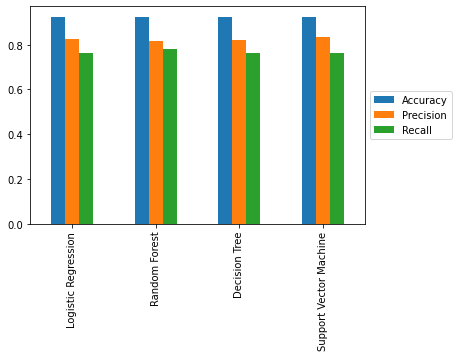

In [142]:
df_model.plot(kind = 'bar')
plt.xticks(df_model.index,df_model["Model"].values)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

Predicting a result using Support Vector Machine

0: EU (excluding UK)
1: Not EU
2: UK

0: Women
1: Men



In [143]:
df.to_excel("df.xlsx")

Predicting a result using Support Vector Machine Model

In [145]:
domicile = 2
gender = 0
ethnicity =  1
disability = 1
deferred_status = 0
live_at_home = 1
year = 2018
offer = 21
uncond = 0
cond = 0
firmreply = 0
insurancereply = 0
reject = 0
decline = 0
decline_by_default = 1
withdrawal = 0

#actual result is 0

y_pred = svm.predict(scaler.transform([[domicile, gender,ethnicity, disability, deferred_status, live_at_home, year, offer, uncond, cond, firmreply,insurancereply, reject, decline, decline_by_default, withdrawal]]))
y_pred

array([0])